<div style="text-align: center">
  <h1><b>Amazavr Sales Performance Analysis</b></h1>
</div>

# **1) Introduction**
Amazavr, a leading online retailer that sells a wide range of products across categories like Electronics, Clothing, Home Goods, Beauty, and Sports. With a global customer base and thousands of daily transactions, efficient inventory management is crucial for maintaining profitability and customer satisfaction.

**Sales performance research**

**Objective:** The primary objective is to perform a comprehensive analysis of sales performance for various products across categories. We aim to identify the best-selling products and evaluate how different product categories perform in terms of sales. This analysis will help in making informed decisions about inventory management, marketing strategies, and product focus.

In [ ]:
import os
print(os.getcwd())

/content


# **2) Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df_amazavr = pd.read_csv("/Users/poornimachittorkashivishwanath/Desktop/Files_for_Google_Drive/amazavr_inventory.csv")

# **3) Exploratory Data Analysis**

## **3.1) Data Inspection**

In [ ]:
df_amazavr.head()

,Unnamed: 0,Product ID,Product Name,Category,Supplier,Month,Unit Price,Stock Quantity,Monthly Sales,Monthly Revenue,Discount %,Reorder Level,Shelf Life (Days),Storage Cost per Unit,Supplier Dependency,Units Defective
0,0,P00071,Kitchen Utensils,Home Goods,GreenLife,01-03-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
1,1,P00071,Kitchen Utensils,Home Goods,GreenLife,01-04-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
2,2,P00071,Kitchen Utensils,Home Goods,GreenLife,01-05-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
3,3,P00071,Kitchen Utensils,Home Goods,GreenLife,01-06-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0
4,4,P00071,Kitchen Utensils,Home Goods,GreenLife,01-07-2023,170.37,31,20,3407.4,0.0,29,667,11.31,15,0


In [ ]:
df_amazavr.describe()

,Unnamed: 0,Unit Price,Stock Quantity,Monthly Sales,Monthly Revenue,Discount %,Reorder Level,Shelf Life (Days),Storage Cost per Unit,Supplier Dependency,Units Defective
count,525120.000000,522495.000000,525120.000000,525120.000000,525120.000000,525120.000000,525120.000000,525120.000000,525120.000000,525120.000000,525120.000000
mean,262559.500000,395.162013,701.334087,760.036276,52027.999955,2.714517,357.254386,382.339442,7.994470,51.529296,53.316027
std,151589.231015,572.578427,1300.944785,1329.699270,94107.956283,5.873371,780.990028,202.145925,16.701088,25.238991,91.361965
min,0.000000,5.010000,10.000000,10.000000,148.830000,0.000000,10.000000,30.000000,1.000000,0.000000,0.000000
25%,131279.750000,43.510000,31.000000,30.000000,8346.240000,0.000000,17.000000,208.000000,3.010000,30.000000,0.000000
50%,262559.500000,136.340000,60.000000,50.000000,21571.600000,0.000000,36.000000,384.000000,10.040000,50.000000,3.000000
75%,393839.250000,468.050000,350.000000,500.000000,53788.350000,2.210000,174.000000,558.000000,12.510000,70.000000,61.000000
max,525119.000000,2999.050000,3890.000000,4000.000000,797440.000000,100.000000,3874.000000,730.000000,2960.650000,100.000000,398.000000


In [ ]:
# Shape of data set
df_amazavr.shape

(525120, 16)

In [ ]:
df_amazavr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525120 entries, 0 to 525119
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             525120 non-null  int64  
 1   Product ID             525120 non-null  object 
 2   Product Name           525120 non-null  object 
 3   Category               525120 non-null  object 
 4   Supplier               525120 non-null  object 
 5   Month                  525120 non-null  object 
 6   Unit Price             522495 non-null  float64
 7   Stock Quantity         525120 non-null  int64  
 8   Monthly Sales          525120 non-null  int64  
 9   Monthly Revenue        525120 non-null  float64
 10  Discount %             525120 non-null  float64
 11  Reorder Level          525120 non-null  int64  
 12  Shelf Life (Days)      525120 non-null  int64  
 13  Storage Cost per Unit  525120 non-null  float64
 14  Supplier Dependency    525120 non-nu

## **3.2) Data Preprocessing and Data Cleaning**

### **3.2.1) Removing unwanted columns**

We are focusing on understanding sales performance, including identifying the top-selling products, analyzing category-level sales.

Columns that do not directly contribute to these objectives are removed to simplify the analysis. Only the columns directly related to sales analysis are retained, which ensures we focus on the key variables driving the analysis and insights.

In [ ]:
df_amazavr_final = df_amazavr.drop(columns = ["Unnamed: 0", "Supplier", "Stock Quantity", "Reorder Level", "Shelf Life (Days)", "Storage Cost per Unit", "Supplier Dependency"])
df_amazavr_final.head()

,Product ID,Product Name,Category,Month,Unit Price,Monthly Sales,Monthly Revenue,Discount %,Units Defective
0,P00071,Kitchen Utensils,Home Goods,01-03-2023,170.37,20,3407.4,0.0,0
1,P00071,Kitchen Utensils,Home Goods,01-04-2023,170.37,20,3407.4,0.0,0
2,P00071,Kitchen Utensils,Home Goods,01-05-2023,170.37,20,3407.4,0.0,0
3,P00071,Kitchen Utensils,Home Goods,01-06-2023,170.37,20,3407.4,0.0,0
4,P00071,Kitchen Utensils,Home Goods,01-07-2023,170.37,20,3407.4,0.0,0


### **3.2.2) Handling null values / missing values**

In [ ]:
df_amazavr_final.isnull().sum()

Product ID            0
Product Name          0
Category              0
Month                 0
Unit Price         2625
Monthly Sales         0
Monthly Revenue       0
Discount %            0
Units Defective       0
dtype: int64

**Summary of the findings:**

- The 'Unit Price' column contains 2,625 null or missing values. We assume these values were not updated since the corresponding entries for 'monthly sales' and 'revenue' are still present.

- The unit price is updated by calculating it as the monthly revenue divided by the monthly sales.

- Cross-checked the values for the remaining non-null rows, and they are consistent and correct as per the above applied formula.

In [ ]:
# Fill null values with calculated values
df_amazavr_final['Unit Price'] = df_amazavr_final['Unit Price'].fillna(df_amazavr_final['Monthly Revenue'] / df_amazavr_final['Monthly Sales'])

In [ ]:
df_amazavr_final.isnull().sum()

Product ID         0
Product Name       0
Category           0
Month              0
Unit Price         0
Monthly Sales      0
Monthly Revenue    0
Discount %         0
Units Defective    0
dtype: int64

### **3.2.3) Checking duplicate values**

In [ ]:
df_amazavr_final.duplicated().sum()

340

**Further analysis of duplicate values:**

Based on the result above, it indicates that there are 340 duplicates. Therefore, we are analyzing each row and column to gain a better understanding.

In [ ]:
# Check for duplicated values in each column
duplicated_columns = df_amazavr_final.columns[df_amazavr_final.columns.duplicated(keep=False)]

duplicated_columns

Index([], dtype='object')

**Summary of the findings:**

- The result above proves that there are no duplicate values in columns. As part of our next step we check the row values

In [ ]:
# To identify duplicate rows including the first occurrence, you can use keep=False
all_duplicate_rows = df_amazavr_final[df_amazavr_final.duplicated(keep=False)]
all_duplicate_rows

,Product ID,Product Name,Category,Month,Unit Price,Monthly Sales,Monthly Revenue,Discount %,Units Defective
3229,P00003,Laptop,Electronics,01-12-2023,1650.90,17,28065.30,19.43,0
4929,P00003,Laptop,Electronics,01-12-2023,1716.13,10,17161.30,0.00,0
9469,P00003,Laptop,Electronics,01-12-2023,1829.01,38,69502.38,2.00,2
11709,P00003,Laptop,Electronics,01-12-2023,1288.17,20,25763.40,0.00,1
16209,P00003,Laptop,Electronics,01-12-2023,1854.38,28,51922.64,0.00,1
...,...,...,...,...,...,...,...,...,...
525115,P00003,Laptop,Electronics,01-12-2023,1804.97,39,70393.83,0.00,2
525116,P00003,Laptop,Electronics,01-12-2023,1124.26,43,48343.18,20.25,3
525117,P00003,Laptop,Electronics,01-12-2023,877.79,41,35989.39,0.00,2
525118,P00003,Laptop,Electronics,01-12-2023,842.51,38,32015.38,28.45,1


**Summary of the findings:**

- The result above indicates that there are 527 duplicate rows. Further analysis to check if the data corresponds to different months

In [ ]:
# Ensuring that the 'Month' column is in datetime format
df_amazavr_final['Month'] = pd.to_datetime(df_amazavr_final['Month'], format='%d-%m-%Y')
# Ensure that the date format is yyyy-mm-dd
print(df_amazavr_final['Month'].dtype)

datetime64[ns]


**Note:** The output datetime64[ns], confirms that the column is treated as a datetime object. Pandas internally represents datetime as YYYY-MM-DD.

**Summary of the findings about duplicate values:**

- We assume that the duplicates in the rows correspond to the product_id, product name, category, and month.

- The rows with similar entries across all columns, except for the change in the month number, have been retained as they represent data from different months and impact the monthly sales figures. However, these entries appear unusual and requires further investigation to confirm their validity.

### **3.2.4) Data Inconsistency or data discrepencies**

- Some products (P00134, P00124, P00129 & P00058) from home goods and electronics category has been provided with a discount of 100%. This needs to be checked.

- The Monthly Revenue column shows the original value(monthly sales * Unit price). In order to get the accurate monthly revenue values, the amount should be calculated considering the discount %.

## **3.3) Assumptions**

- The 'Monthly Sales' column represents the quantity of items sold, not the price.

- The duplicates in the rows correspond to the product_id, product name, category, and month.

## **3.4) Data Preparation**

### **3.4.1) Create the necessary new columns to enhance the analysis of sales performance**

**1) Season** - To check the seasonal sales trend and understand how different seasons affect sales performance. This will help in identifying peak sales periods, forecasting demand, and planning inventory more effectively.

**2) Defective Rate %** - Key performance indicator used to assess the quality of products by measuring the proportion of defective units relative to the total number of units sold. It helps businesses identify product quality issues, track manufacturing performance, and assess customer satisfaction.

**3) Mon Rev Discounted** - New column to reflect the Monthly Revenue value after applying the discount, ensuring that the calculations remain accurate and consistent.

In [ ]:
# Calculated field - Season

# Defining a function to assign seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'Season' column
df_amazavr_final['Season'] = df_amazavr_final['Month'].dt.month.apply(assign_season)
df_amazavr_final.head()

,Product ID,Product Name,Category,Month,Unit Price,Monthly Sales,Monthly Revenue,Discount %,Units Defective,Season
0,P00071,Kitchen Utensils,Home Goods,2023-03-01,170.37,20,3407.4,0.0,0,Spring
1,P00071,Kitchen Utensils,Home Goods,2023-04-01,170.37,20,3407.4,0.0,0,Spring
2,P00071,Kitchen Utensils,Home Goods,2023-05-01,170.37,20,3407.4,0.0,0,Spring
3,P00071,Kitchen Utensils,Home Goods,2023-06-01,170.37,20,3407.4,0.0,0,Summer
4,P00071,Kitchen Utensils,Home Goods,2023-07-01,170.37,20,3407.4,0.0,0,Summer


In [ ]:
# Calculated field - Defective Rate %
df_amazavr_final["Defective Rate (%)"] = ((df_amazavr_final["Units Defective"] / df_amazavr_final["Monthly Sales"]) * 100).round(2)
df_amazavr_final.head()

,Product ID,Product Name,Category,Month,Unit Price,Monthly Sales,Monthly Revenue,Discount %,Units Defective,Season,Defective Rate (%)
0,P00071,Kitchen Utensils,Home Goods,2023-03-01,170.37,20,3407.4,0.0,0,Spring,0.0
1,P00071,Kitchen Utensils,Home Goods,2023-04-01,170.37,20,3407.4,0.0,0,Spring,0.0
2,P00071,Kitchen Utensils,Home Goods,2023-05-01,170.37,20,3407.4,0.0,0,Spring,0.0
3,P00071,Kitchen Utensils,Home Goods,2023-06-01,170.37,20,3407.4,0.0,0,Summer,0.0
4,P00071,Kitchen Utensils,Home Goods,2023-07-01,170.37,20,3407.4,0.0,0,Summer,0.0


In [ ]:
# Calculated field - Mon Rev Discounted
df_amazavr_final["Mon Rev Discounted"] = ((df_amazavr_final["Unit Price"] - (df_amazavr_final["Unit Price"] * df_amazavr_final["Discount %"]/100)) * df_amazavr_final["Monthly Sales"]).round(2)
df_amazavr_final.tail()

,Product ID,Product Name,Category,Month,Unit Price,Monthly Sales,Monthly Revenue,Discount %,Units Defective,Season,Defective Rate (%),Mon Rev Discounted
525115,P00003,Laptop,Electronics,2023-12-01,1804.97,39,70393.83,0.00,2,Winter,5.13,70393.83
525116,P00003,Laptop,Electronics,2023-12-01,1124.26,43,48343.18,20.25,3,Winter,6.98,38553.69
525117,P00003,Laptop,Electronics,2023-12-01,877.79,41,35989.39,0.00,2,Winter,4.88,35989.39
525118,P00003,Laptop,Electronics,2023-12-01,842.51,38,32015.38,28.45,1,Winter,2.63,22907.00
525119,P00003,Laptop,Electronics,2023-12-01,1415.76,34,48135.84,28.33,1,Winter,2.94,34498.96


# **4) Descriptive Statistical Analysis**

In [ ]:
# To ensure that categorical features are also included in the output, we use df.describe() and assign 'include = 'all'
df_amazavr_final.describe(include = "all")

,Product ID,Product Name,Category,Month,Unit Price,Monthly Sales,Monthly Revenue,Discount %,Units Defective,Season,Defective Rate (%),Mon Rev Discounted
count,525120,525120,525120,525120,525120.000000,525120.000000,525120.000000,525120.000000,525120.000000,525120,525120.000000,525120.000000
unique,143,36,5,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,P00003,Dress Shoes,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN
freq,5520,15340,146500,NaN,NaN,NaN,NaN,NaN,NaN,157434,NaN,NaN
mean,NaN,NaN,NaN,2023-12-16 05:45:46.892139264,395.215319,760.036276,52027.999955,2.714517,53.316027,NaN,5.262132,50836.283160
min,NaN,NaN,NaN,2023-03-01 00:00:00,5.010000,10.000000,148.830000,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,2023-08-01 00:00:00,43.497500,30.000000,8346.240000,0.000000,0.000000,NaN,0.000000,8071.100000
50%,NaN,NaN,NaN,2023-12-01 00:00:00,136.310000,50.000000,21571.600000,0.000000,3.000000,NaN,4.880000,21043.920000
75%,NaN,NaN,NaN,2024-05-01 00:00:00,468.062500,500.000000,53788.350000,2.210000,61.000000,NaN,8.180000,52441.830000
max,NaN,NaN,NaN,2024-10-01 00:00:00,2999.050000,4000.000000,797440.000000,100.000000,398.000000,NaN,15.000000,797440.000000


**Summary of the key findings of Statistical Insights**

- The dataset contains 5 categories, with Electronics being the most popular.

- The top-selling product is Dress Shoes, making it the most frequently purchased product.

- There is a significant range in revenue, as shown by the high standard deviation, indicating variability in sales performance across months or products.

- The average monthly sales is 760 units, with a maximum of 4,000 units sold in a single month. There are likely some outliers, given the high variance in the data.

- The average discount offered is 2.71%, with discounts ranging from 0% to 100%. This wide range indicates that discount strategies vary greatly across products or categories.

In [ ]:
df_amazavr_final.shape

(525120, 12)

In [ ]:
# Discount analysis
discount_analysis = df_amazavr_final.groupby('Category')['Discount %'].mean().reset_index()

# Rounding the discount % value for better readability
discount_analysis['Discount %'] = discount_analysis['Discount %'].round(2)
discount_analysis = discount_analysis.sort_values(by='Discount %', ascending=False)
discount_analysis

,Category,Discount %
2,Electronics,3.15
3,Home Goods,2.97
1,Clothing,2.74
4,Sports,2.72
0,Beauty,1.59


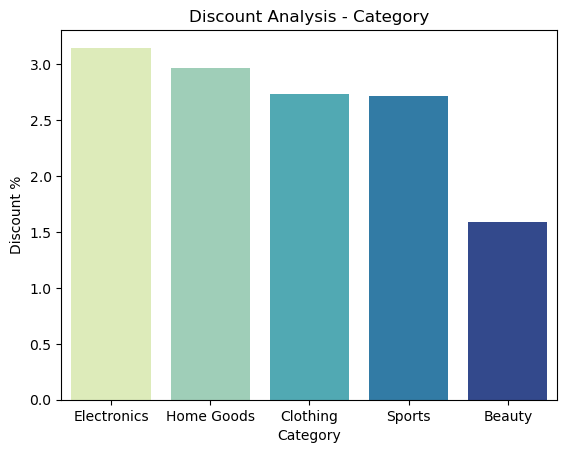

In [ ]:
# Visualization of discount analysis
sns.barplot(data=discount_analysis, x='Category', y='Discount %', hue = 'Category', palette='YlGnBu')
plt.title('Discount Analysis - Category')
plt.show()

**Summary of the key findings**

- The discount percentages vary only slightly across categories (between 1.59% and 3.15%), with Electronics leading and Beauty trailing.
- Electronics and Home Goods likely rely on discounts to boost sales, while Beauty maintains a more conservative discounting strategy.

# **5) Business questions**

1) Which product categories contribute the most to overall revenue?

2) Which products are the top sellers within each category?

3) How do sales trends vary by season, and are there any seasonal patterns that influence product performance?

4) Which categories have the highest defective rates?

5) What is the Top 10 average sales performance per product?

### **1. Which product categories contribute the most to overall revenue?**

In [ ]:
# Group by the 'Category' column and calculate the sum of total sales revenue for each category
category_analysis = df_amazavr_final.groupby('Category')['Mon Rev Discounted'].sum().reset_index()
# Sort the categories by total sales revenue in descending order to see most contributed categories
category_analysis = category_analysis.sort_values(by='Mon Rev Discounted', ascending=False)
category_analysis


,Category,Mon Rev Discounted
0,Beauty,1.264517e+10
4,Sports,5.469003e+09
1,Clothing,3.452371e+09
2,Electronics,3.314044e+09
3,Home Goods,1.814557e+09


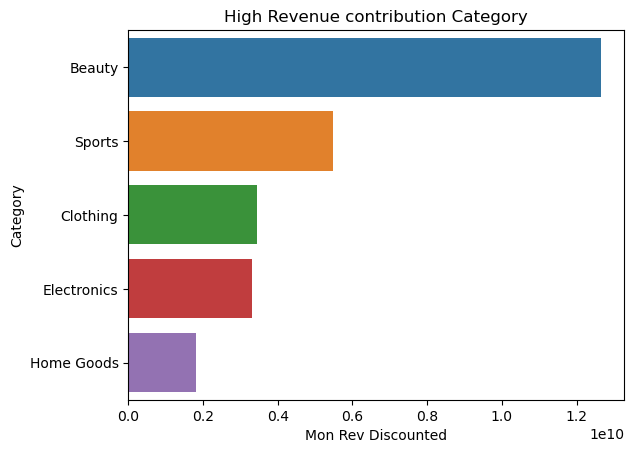

In [ ]:
# Horizontal Bar plot to visualize high sales revenue category
category_analysis = category_analysis.sort_values(by='Mon Rev Discounted', ascending=False)
sns.barplot(data = category_analysis, y = "Category", x = "Mon Rev Discounted", hue = "Category")
plt.title("High Revenue contribution Category")
plt.show()

**Summary of the key findings**

- Beauty category stands out as the highest contributor to overall sales revenue followed by Sports

- Home Goods contributed the least to total sales revenue.

### **2. Which products are the top sellers within each category?**

In [ ]:
# Get the top-selling product in each category
product_analysis = df_amazavr_final.groupby(['Category', 'Product Name'], as_index=False)['Monthly Sales'].sum()

# Sorting by 'Category' and then by 'Monthly Sales' in descending order
product_analysis = product_analysis.sort_values(by=['Category', 'Monthly Sales'], ascending=[True, False])

# Selecting the top product by sales within each category
product_analysis = product_analysis.groupby('Category').head(1).reset_index(drop=True)

# Sorting the final DataFrame in descending order of 'Monthly Sales'
product_analysis = product_analysis.sort_values(by='Monthly Sales', ascending=False).reset_index(drop=True)

product_analysis

,Category,Product Name,Monthly Sales
0,Beauty,Shampoo,56563320
1,Clothing,Dress Shoes,7655060
2,Sports,Dumbbells,4206020
3,Electronics,Laptop,461809
4,Home Goods,Vacuum Cleaner,460260


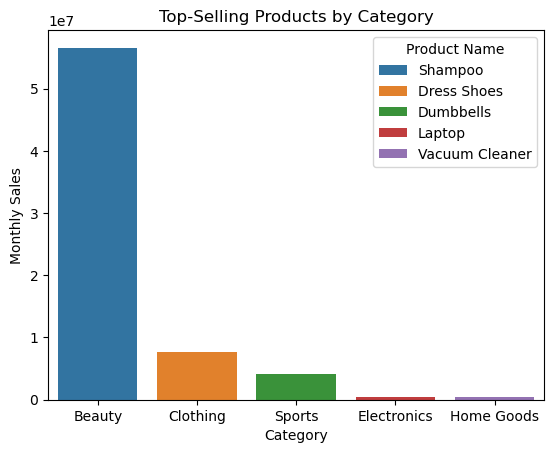

In [ ]:
# Bar plot to visualize the top-selling products in each category
sns.barplot(data=product_analysis, x='Category', y='Monthly Sales', hue='Product Name')
plt.title('Top-Selling Products by Category')
plt.show()

**Summary of the key findings**

- Shampoo and Dress shoes stand out in their respective categories due to their high monthly sales.

- Laptop and Vaccum cleaner are the least sold products.

### **3. How do sales trends vary by season, and are there any patterns that influence product performance?**

In [ ]:
# Understanding of the sales over different seasons
season_analysis = df_amazavr_final.sort_values(by='Monthly Sales', ascending=False)
# Aggregating the sum of monthly sales and grouping them by season
season_analysis = season_analysis.groupby('Season').agg({'Monthly Sales': 'sum'}).reset_index()
season_analysis

,Season,Monthly Sales
0,Fall,99775165
1,Spring,119730198
2,Summer,119730198
3,Winter,59874688


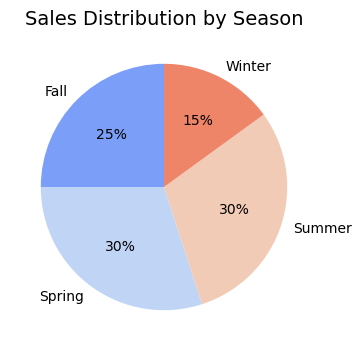

In [ ]:
# Pie chart to understand the sales by season
labels = season_analysis['Season']
values = season_analysis['Monthly Sales']

# Create the pie chart with the sales values displayed
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, startangle=90, colors=sns.color_palette('coolwarm', len(labels)), autopct='%1.0f%%')
plt.title('Sales Distribution by Season', fontsize=14)
plt.show()

**Summary of the key findings**

- Spring and Summer are the most profitable seasons, contributing equally to the overall sales.

- Winter is the least profitable season, this could be an area for further analysis and potential growth opportunities.

### **4) Which categories have the highest defective rates?**

In [ ]:
# Calculate defective rate
defective_rate_analysis = df_amazavr_final.groupby('Category')['Defective Rate (%)'].mean().reset_index()

# Rounding the defective rate value for better readability

defective_rate_analysis['Defective Rate (%)'] = defective_rate_analysis['Defective Rate (%)'].round(2)
defective_rate_analysis = defective_rate_analysis.sort_values(by='Defective Rate (%)', ascending=False)
defective_rate_analysis

,Category,Defective Rate (%)
1,Clothing,12.37
0,Beauty,6.45
4,Sports,6.37
2,Electronics,3.90
3,Home Goods,0.03


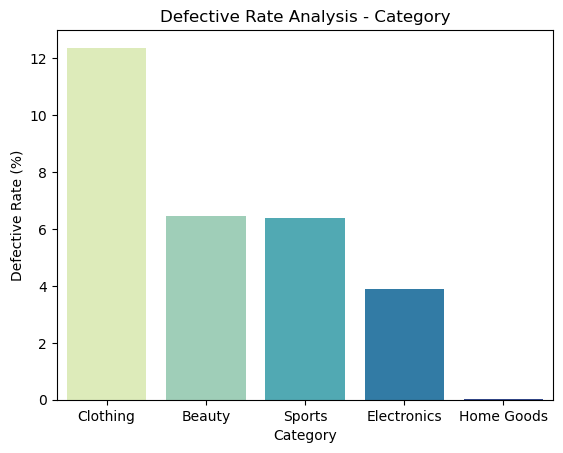

In [ ]:
# Visualize defective rate % - Category
sns.barplot(data=defective_rate_analysis, x='Category', y='Defective Rate (%)', hue = 'Category', palette='YlGnBu')
plt.title('Defective Rate Analysis - Category')
plt.show()


**Summary of the key findings**

- Clothing has the highest defective rate, indicating a need for improved quality control in this category.

- Beauty and Sports categories also exhibit notable defect rates that might require attention.

- Electronics show a moderate defect rate, with potential for improvement.

- Home Goods demonstrate the lowest defective rate, highlighting their strong quality control practices.

### **5) What is the Top 10 average sales performance per product?**

In [ ]:
# Calculate the average sales performance of products
Top10_Avg_SP_product_analysis = df_amazavr_final.groupby('Product Name')['Monthly Sales'].mean().round(2).reset_index()
Top10_Avg_SP_product_analysis = Top10_Avg_SP_product_analysis.sort_values(by='Monthly Sales', ascending=False)
Top10_Avg_SP_product_analysis = Top10_Avg_SP_product_analysis.head(10)
Top10_Avg_SP_product_analysis

,Product Name,Monthly Sales
23,Shampoo,3716.38
12,Foundation,3711.85
10,Face Cream,3704.77
18,Lipstick,3700.23
5,Body Wash,3699.98
21,Perfume,3697.15
15,Jeans,503.70
28,T-Shirt,502.03
14,Jacket,501.80
1,Backpack,501.34


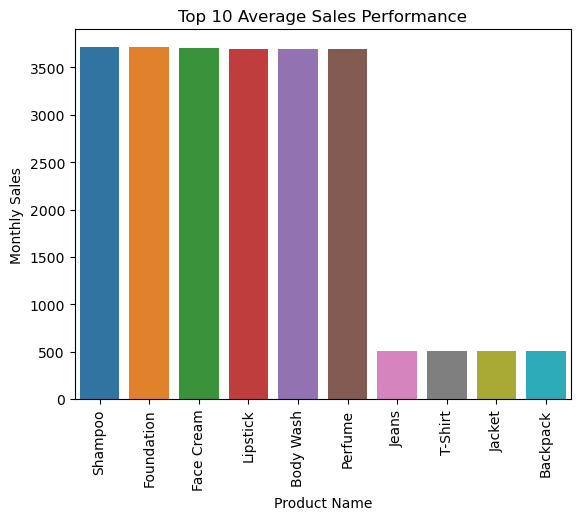

In [ ]:
# Visualize Average Sales performance of products
sns.barplot(data=Top10_Avg_SP_product_analysis, x='Product Name', y='Monthly Sales', hue = 'Product Name')
plt.title('Top 10 Average Sales Performance')
plt.xticks(rotation=90)
plt.show()

**Summary of the key findings**

- The highest average sales are from Beauty and Personal Care products like Shampoo, Foundation, and Face Cream

- Products such as Jeans, T-Shirt, and Backpack have much lower average sales.

- Focus on maintaining inventory for high-performing beauty products, while considering promotions or bundling strategies to boost sales in the lower-performing clothing category.

# **6) Recommendation**

By focusing on these strategies, Amazavr can capitalize on high-performing categories, optimize product offerings, and improve overall profitability across different seasons and product categories.

**1. Focus on High-Performing Categories / Products:**

- Invest more in Beauty and Sports products due to high revenue contribution.

- Focus on maintaining inventory for Shampoo and Dress shoes which are top selling products.

**2. Improve Underperforming Categories:**

- Investigate customer preferences for Home Goods & Electronics and offer seasonal promotions.
  
**3. Leverage Seasonal Trends:**

- Optimize inventory on Spring and Summer for higher sales.

- Explore strategies to boost Winter sales with winter-specific products or seasonal marketing campaigns.

**4. Focus on Quality Control:**

- To improve quality in the Clothing, Beauty, and Sports categories with high defect rates, more frequent testing of finished products before shipment is essential.

- Improving product durability, packaging, and supplier relationships can significantly reduce defective rates.

In [ ]:
df_amazavr_final.to_csv('/Users/poornimachittorkashivishwanath/Desktop/Home_Assignments/Webeet_HA_DA/amazavr_inventory_tableau.csv', index=False)